### TMA4215 Numerisk Matematikk 

Høst 2021 – September 24, 2021

R. Bergmann, E. Çokaj, O. P. Hellan 

# Assignment 3

## Deadline
October 1, 2021, 23:59


## Submission
submit your Jupyter notebook containing the solution via upload in blackboard.

## Problem 1

1. Consider the Problem
   \begin{equation*}
	   \operatorname*{arg\,min}_{\mathbf x\in \mathbb R^2}
       x_1^2 + (x_2-3)^2.
   \end{equation*}
   Compute two steps of the gradient method with exact line search starting from $\mathbf x^{(0)} = (0,0)^{\mathrm{T}}$.

$f(\textbf{x})=x_1^2+(x_2-3)^2$.

$\nabla f = (2x_1,2(x_2-3))^T$.

Gradient method/steepest descent:

$\textbf{x}^{(k+1)}=\textbf{x}^{(k)}+\alpha_k\textbf{d}^{(k)}$, with $\textbf{d}^{(k)}=-\nabla f(\textbf{x}^{(k)}).$

Exact line search: 
finding $\alpha$ such that $f(\textbf{x}^{(k)}+\alpha\textbf{d}^{(k)})$ is minimised. 

To compute $x^{(1)}$ we need to first compute $\alpha_0$:

$\alpha_0 = argmin_{\alpha\geq0}{f(\textbf{x}^{(0)}-\alpha\nabla f(\textbf{x}^{(0)}))}$.

$f(\textbf{x}^{(k)}-\alpha\nabla f(\textbf{x}^{(k)})=f([0,0]-\alpha[0,-6]) = f([0,6\alpha]) = 0^2+(6\alpha-3)^2$.

This is minimised when $\alpha=0.5 \implies \alpha_0 =0.5$. 

Now we can compute the first step: 

$\textbf{x}^{(1)}=\textbf{x}^{(0)}-\alpha_0\nabla f(\textbf{x}^{(0)})=$

$[0,0]-\frac{1}{2}[0,-6] = [0,3]$. This is actually the exact solution. 

Step 2: 

$\alpha_1 = f([0,3]-\alpha_1 [0,2(3-3)]) = f([0,3])\implies \alpha_1=0.$ 

$\textbf{x}^{(2)}=\textbf{x}^{(1)}-\alpha_1 \nabla f(\textbf{x}^{(1)})=\nabla f(\textbf{x}^{(1)})=[0,3].$

## Problem 2

Let $A\in \mathbb R^{n\times n}$, $\mathbf b\in\mathbb R^{n}$, and $\lambda > 0$ be given.

Assume we want to avoid too large solutions. Then we can look at the (so-called) Thikonov regularisation. Instead of solving $A\mathbf x = \mathbf b$ we solve

$$
F(\mathbf x) = \lVert A\mathbf x - \mathbf b\rVert_2^2 + \lambda\lVert \mathbf x \rVert_2^2
$$

1. Show that $F$ has a unique solution by computing the gradient and the Hessian of $F$, using the gradient to obtain the solution and arguing that the Hessian is symmetric positive definte. 
2. Develop the gradient descent method for $F$ for given step sizes $\alpha_k$ (i.e. they are given by the user).
3. _Bonus question_: Derive a closed form solution for exact line search for $\alpha_k$ in the gradient descent, i.e. at $\mathbf x^{(k)}$ with step $\mathbf d^{(k)}$, find $\alpha_k$ that minimizes $\phi(\alpha) = F(\mathbf x^{(k)} + \alpha\mathbf d^{(k)})$.


**2.1**

To compute the gradient we need to differentiate $\textbf{F}$ with regards to all $x_i$. I will compute in regards to an arbitrary $x_k$, and then see what it will look like for all $x_i$.
I will compute the gradient of the two norms by themselves, and then combine to obtain the result. 

$||A\vec{x}-\vec{b}||_2^2 = \sum_{i=1}^n|A\vec{x}-\vec{b}|_i^2 =$

$\sum_{i=1}^n(A\vec{x}-\vec{b})^T(A\vec{x}-\vec{b})=$

$((A\vec{x})^T-\vec{b}^T)(A\vec{x}-\vec{b})=$

$(A\vec{x})^T(A\vec{x})-(A\vec{x})^T\vec{b}-\vec{b}^T(A\vec{x})+\vec{b}^T\vec{b}=$

$||A\vec{x}||^2 - (A\vec{x},b) - (b,A\vec{x}) +\vec{b}^T\vec{b}=$

$||A\vec{x}||^2 - 2\vec{b}^TA\vec{x} +\vec{b}^T\vec{b}=$

$\frac{\partial}{\partial x_k}(\sum_{i=1}^n|A\vec{x}-\vec{b}|_i^2)=$

$ \frac{\partial}{\partial x_k}(||A\vec{x}||^2 - 2\vec{b}^TA\vec{x} +\vec{b}^T\vec{b})=$

$(2A^TA\vec{x})_k-(2A^T\vec{b})_k$

$----------------------$

$||\vec{x}||_2^2 = \sum_{i=1}^n |x_i|^2$.

$\frac{\partial}{\partial{x_k}}(\sum_{i=1}^n |x_i|^2)=$

$2x_k$

$----------------------$

$\implies$

$\nabla\textbf{F}= 2A^TA\textbf{x}-2A^T\textbf{b}+2\lambda I\textbf{x}$

Solving $2A^TA\textbf{x}-2A^T\textbf{b}+2\lambda I\textbf{x}=0$ for $\textbf{x}$ gives

$A^TA\textbf{x}-A^T\textbf{b}+\lambda I\textbf{x}=0$

$A^TA\textbf{x}+\lambda I\textbf{x}=A^T\textbf{b}$

$\textbf{x}=(A^TA+\lambda I)^{-1}A^T\textbf{b}$

If the Hessian is positive definite, then we know this is the unique solution, by the theorem of second order sufficient conditions. 

The Hessian is

$\nabla^2\textbf{F} = H_F = 2A^TA+2\lambda I$.

The sum of two positive definite matrices is also positive definite, so it is enough to show it seperately. $2\lambda I$ is a diagonal matrix with positive entries, which means it is symmetric positive definite. 

As for $2A^TA$, we need to show that $\textbf{x}^T2A^TA\textbf{x}>0$. Can do this by using the Euclidian scalar product: 

$<\textbf{x},2A^T\textbf{x}> = <2A^T\textbf{x},\textbf{x}> = 2\textbf{x}^TA^TA\textbf{x}=2(A\textbf{x})^T(A\textbf{x})=2||A\textbf{x}||^2> 0, \forall \textbf{x}\neq\textbf{0}$. 

Since $A^TA$ is symmetric, this means the Hessian is symmetric positive definite, because it is the sum of two symmetric positive definite matrices. q.e.d.

**2.2**

Gradient descent:

$\textbf{x}^{(k+1)}=\textbf{x}^{(k)}-\alpha_k\nabla F(\textbf{x}^{(k)})$

$\textbf{x}^{(k+1)}=\textbf{x}^{(k)}-\alpha_k (2A^TA\textbf{x}^{(k)}-2A^T\textbf{b}+2\lambda I\textbf{x}^{(k)})$

## Problem 3

Implement the gradient method with an Armijo step size strategy for a multivariate function $F: \mathbb R^{n} \to \mathbb R$.

1. Implement a function

   ```
   linesearch_armijo(f, gradf, xk, dk, a0, c, s)
   ```

    that looks for a function value starting with $\mathbf x + a_0 \mathbf d$, decreasing $a_j = c^ja_0$ (obviously $0<c<1$), ... until $f(\mathbf x) - f(\mathbf x + \alpha_j\mathbf d) > -\alpha_j s (\nabla f(\mathbf x)^{\mathrm{T}}\mathbf d)$ for the input parameter $0<s<1$.

2. Implement a function

   ```
   steepest_descent(f, gradf, x0, a0, c, s, xtol, ftol, maxiter)
   ```

   where $a0,c,s$ are parameters for the (inner) Armijo line search,
   and the stopping criterion should be a combination of a maximal number of iterations (`maxiter`), a tolerance in the _change_ of the iterates $\mathbf x^{(k)}$ and a tolerance in the change of the function values. If one of the tolerances is met (i.e. we are _below_) the algorithm should stop.
   Set reasonable default values for these values. For Armijo, a reasonable choice is `a0=1; c=0.5; s=10e-2`.
   As a return value we would like to have the vector of all iterates `[x0, x1,...]`.

3. For the test, please also visualise the iterates in either a plot of the function (1D) or a contour plot of the function (2D).<br>
   a. $f(x) = \cos(x)$ with $x^{(0)}=1.1656$,<br>
   b. Himmelblau's function $F\colon\mathbb R^2 \to \mathbb R$<br>
      $$
      F(\mathbf x) = \bigl( x_1^2+x_2-11 \bigr)^2 + \bigl( x_1+x_2^2-7 \bigr)^2
      $$
    with different start values
    $\mathbf x_a^{(0)} = (-0.27, -0.91)^{\mathrm{T}}$, $\mathbf x_b^{(0)} = (-0.27, -0.91)^{\mathrm{T}}$, $\mathbf x_c^{(0)} = (-0.25 , -1.1)^{\mathrm{T}}$, and $\mathbf x_d^{(0)} = (-0.25, -1)^{\mathrm{T}}$. Visualize all 4 runs in one contour plot.


In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [7]:
def linesearch_armijo(f, gradf, xk, dk, a0, c, s):
    i=0
    while( f(xk)-f(xk+a0*dk)< -a0*s*np.transpose(gradf(xk))@dk):
        a0=c**i*a0
        i+=1
    return a0

In [180]:
#x0 taking in as an array
def steepest_descent(f, gradf, x0, a0, c, s, xtol, ftol, maxiter):
    x_0=x0.copy()
    xk=x_0
    dk=-gradf(xk)
    aj=linesearch_armijo(f, gradf, xk, dk, a0, c, s)
    
    iters=0
    xerror=1
    ferror=1
    x_iterates = [xk]  #saving the iterates
    while( iters<maxiter and xerror > xtol and ferror >ftol):
        temp_x=xk               #saving the variable to calculate error
        temp_f=f(xk)            #saving the variable to calculate error
        
        #Updating all the variables that requite update
        xk=xk-aj*gradf(xk)      
        dk=-gradf(xk)
        aj=linesearch_armijo(f, gradf, xk, dk, a0, c, s)
        fk=f(xk)
        
        #Computing errors
        xerror=np.linalg.norm(temp_x-xk)
        ferror=np.linalg.norm(temp_f-fk)
        
        x_iterates.append(xk) #saving the iterates
        iters+=1
    return np.array(x_iterates)

In [214]:
def g(x0):
    return np.cos(x0)
def gradg(x0):
    return -np.sin(x0)

#Himmelblau's function
def h(x): 
    return (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2
def gradh(x):
    x1=2*(x[0]**2+x[1]-11)*2*x[0]+2*(x[0]+x[1]**2-7)
    x2=2*(x[0]**2+x[1]-11)+2*(x[0]+x[1]**2-7)*2*x[1]
    return np.array([x1, x2])

#Computing steepest descent for f(x)=cos(X)
x_g = steepest_descent(g, gradg,[1.1656],1, 0.5, 0.01, 10**-6, 10**-6, 100)

#Computing steepest descent for Himmelblau's function with three different start-values
xa=steepest_descent(h, gradh,np.array([-0.27,-0.91]),1, 0.5, 0.01, 10**-6, 10**-6, 100)
xb=steepest_descent(h, gradh,np.array([-0.271,-0.91]),1, 0.5, 0.01, 10**-6, 10**-6, 100)
xc=steepest_descent(h, gradh,np.array([-0.25,-1.1]),1, 0.5, 0.01, 10**-6, 10**-6, 100)
xd=steepest_descent(h, gradh,np.array([-0.25,-1.]),1, 0.5, 0.01, 10**-6, 10**-6, 100)

#xb does not give a new minimizer? 
print(optimize.minimize(h,[-0.271,-0.91]))

      fun: 2.9833090677954367e-14
 hess_inv: array([[ 0.01555597, -0.00876694],
       [-0.00876694,  0.03405614]])
      jac: array([ 1.36121948e-06, -7.33067186e-07])
  message: 'Optimization terminated successfully.'
     nfev: 132
      nit: 13
     njev: 33
   status: 0
  success: True
        x: array([3.00000002, 1.99999996])


I have used optimize.minimize(func,x_val) on all of them, and they give the same final x-vector.
I am therefore pretty sure the code is okay.

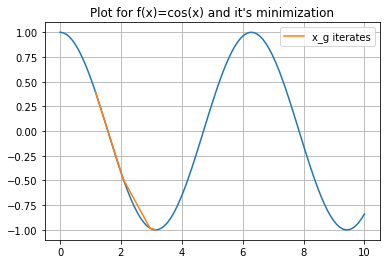

In [177]:
x=np.linspace(0,10,100) # 100 evenly spaced points between 0 and 10
plt.plot(x,g(x))
plt.plot(x_g,g(x_g), label="x_g iterates")
plt.title("Plot for f(x)=cos(x) and it's minimization")
plt.legend()
plt.grid()
plt.show()

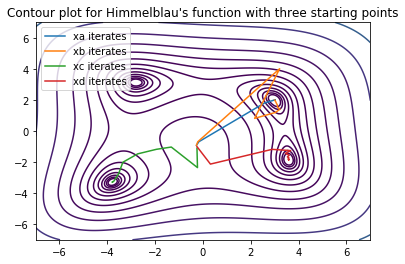

In [213]:
y=np.linspace(-7,7,500) # 500 evenly spaced points between -7 and 7
x=np.linspace(-7,7,500) # 500 evenly spaced points between -7 and 7

X,Y=np.meshgrid(x,y)
plt.contour(x,y, h([X,Y]),np.logspace(0.3, 4, 15))
plt.plot(xa[:,0],xa[:,1], label ="xa iterates")
plt.plot(xb[:,0],xb[:,1], label = "xb iterates")
plt.plot(xc[:,0],xc[:,1], label = "xc iterates")
plt.plot(xd[:,0],xd[:,1], label = "xd iterates")
plt.title("Contour plot for Himmelblau's function with three starting points")
plt.legend()
plt.show()

I can see here that there is another fixed point, and I expected so from the task. 